# Recognising MNIST Handwritten Digits using KNN Classifier

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 # Step:1 Data Generation

In [3]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(df)
print(data.shape)
X = data[:,1:]
Y = data[:,0]
print(X.shape,Y.shape)

(42000, 785)
(42000, 784) (42000,)


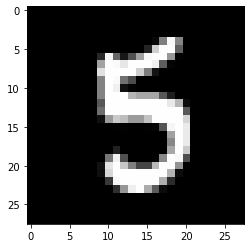

In [5]:
sample = X[40500]
sample = sample.reshape(28,28)
plt.imshow(sample,cmap = 'gray')
plt.show()

# Step 2: KNN algorithm

In [6]:
#Calculating euclidean distance between two samples
def Euclidean_distance(x1,x2):
    return math.sqrt(((x1-x2)**2).sum())


#find the nearest k neighbours and returns the class having max label frequency
def predict_KNN(x,X,Y,K_size = 200):
    distance = []
    m = X.shape[0]
    for i in range(m):
        d = Euclidean_distance(x,X[i])
        distance.append((d,Y[i]))
    distance.sort()
    k_nearest = distance[:K_size]
    
    k_nearest = np.array(k_nearest)
    label_frequency = np.unique(k_nearest[:,1],return_counts = True)
    #(array([3., 5., 8., 9.]), array([  3,  15, 176,   6], dtype=int64))
    max_label_index = label_frequency[1].argmax()
    prediction = label_frequency[0][max_label_index]
    return prediction

#Calculate the accuracy of the model
def get_accuracy(x_test,y_test,X,Y):
    pred_y = []
    m = x_test.shape[0]
    for i in range(m):
        y = predict_KNN(x_test[i],X,Y)
        pred_y.append(y)
    prediction = np.array(pred_y)
    
    return (((prediction == y_test).sum())/m)*100

# Output

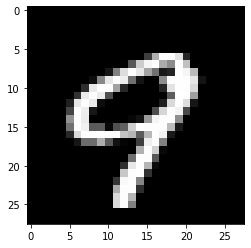

9.0


In [7]:
plt.imshow(X[100].reshape(28,28),cmap = 'gray')
plt.show()
predicted_value = predict_KNN(X[100],X,Y)
print(predicted_value)

In [8]:
testx = X[:10,:]
testy = Y[:10]

In [9]:
get_accuracy(testx,testy,X,Y)

100.0